In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

In [ ]:
df_hhs = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD', parse_dates = ['date'])

https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD

In [ ]:
df_hhs.info()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_hhs.head()

In [91]:
df_hhs.max()

state                                                                                            WY
date                                                                            2022-01-10 00:00:00
critical_staffing_shortage_today_yes                                                            191
critical_staffing_shortage_today_no                                                             495
critical_staffing_shortage_today_not_reported                                                   506
critical_staffing_shortage_anticipated_within_week_yes                                          204
critical_staffing_shortage_anticipated_within_week_no                                           470
critical_staffing_shortage_anticipated_within_week_not_reported                                 506
hospital_onset_covid                                                                        30274.0
hospital_onset_covid_coverage                                                                   597


In [ ]:
df_hhs[df_hhs.date == '2021-07-29']['critical_staffing_shortage_today_yes'].sum()

In [ ]:
date_list = df_hhs.date.unique()

In [ ]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum()))

In [ ]:
df_total_critical = pd.DataFrame(aaa, columns=['date','reported_critical_sum'])

In [79]:
bbb = df_total_critical[-500::]
ccc = bbb.set_index('date')
ccc_moving = ccc.rolling(7).mean().shift()

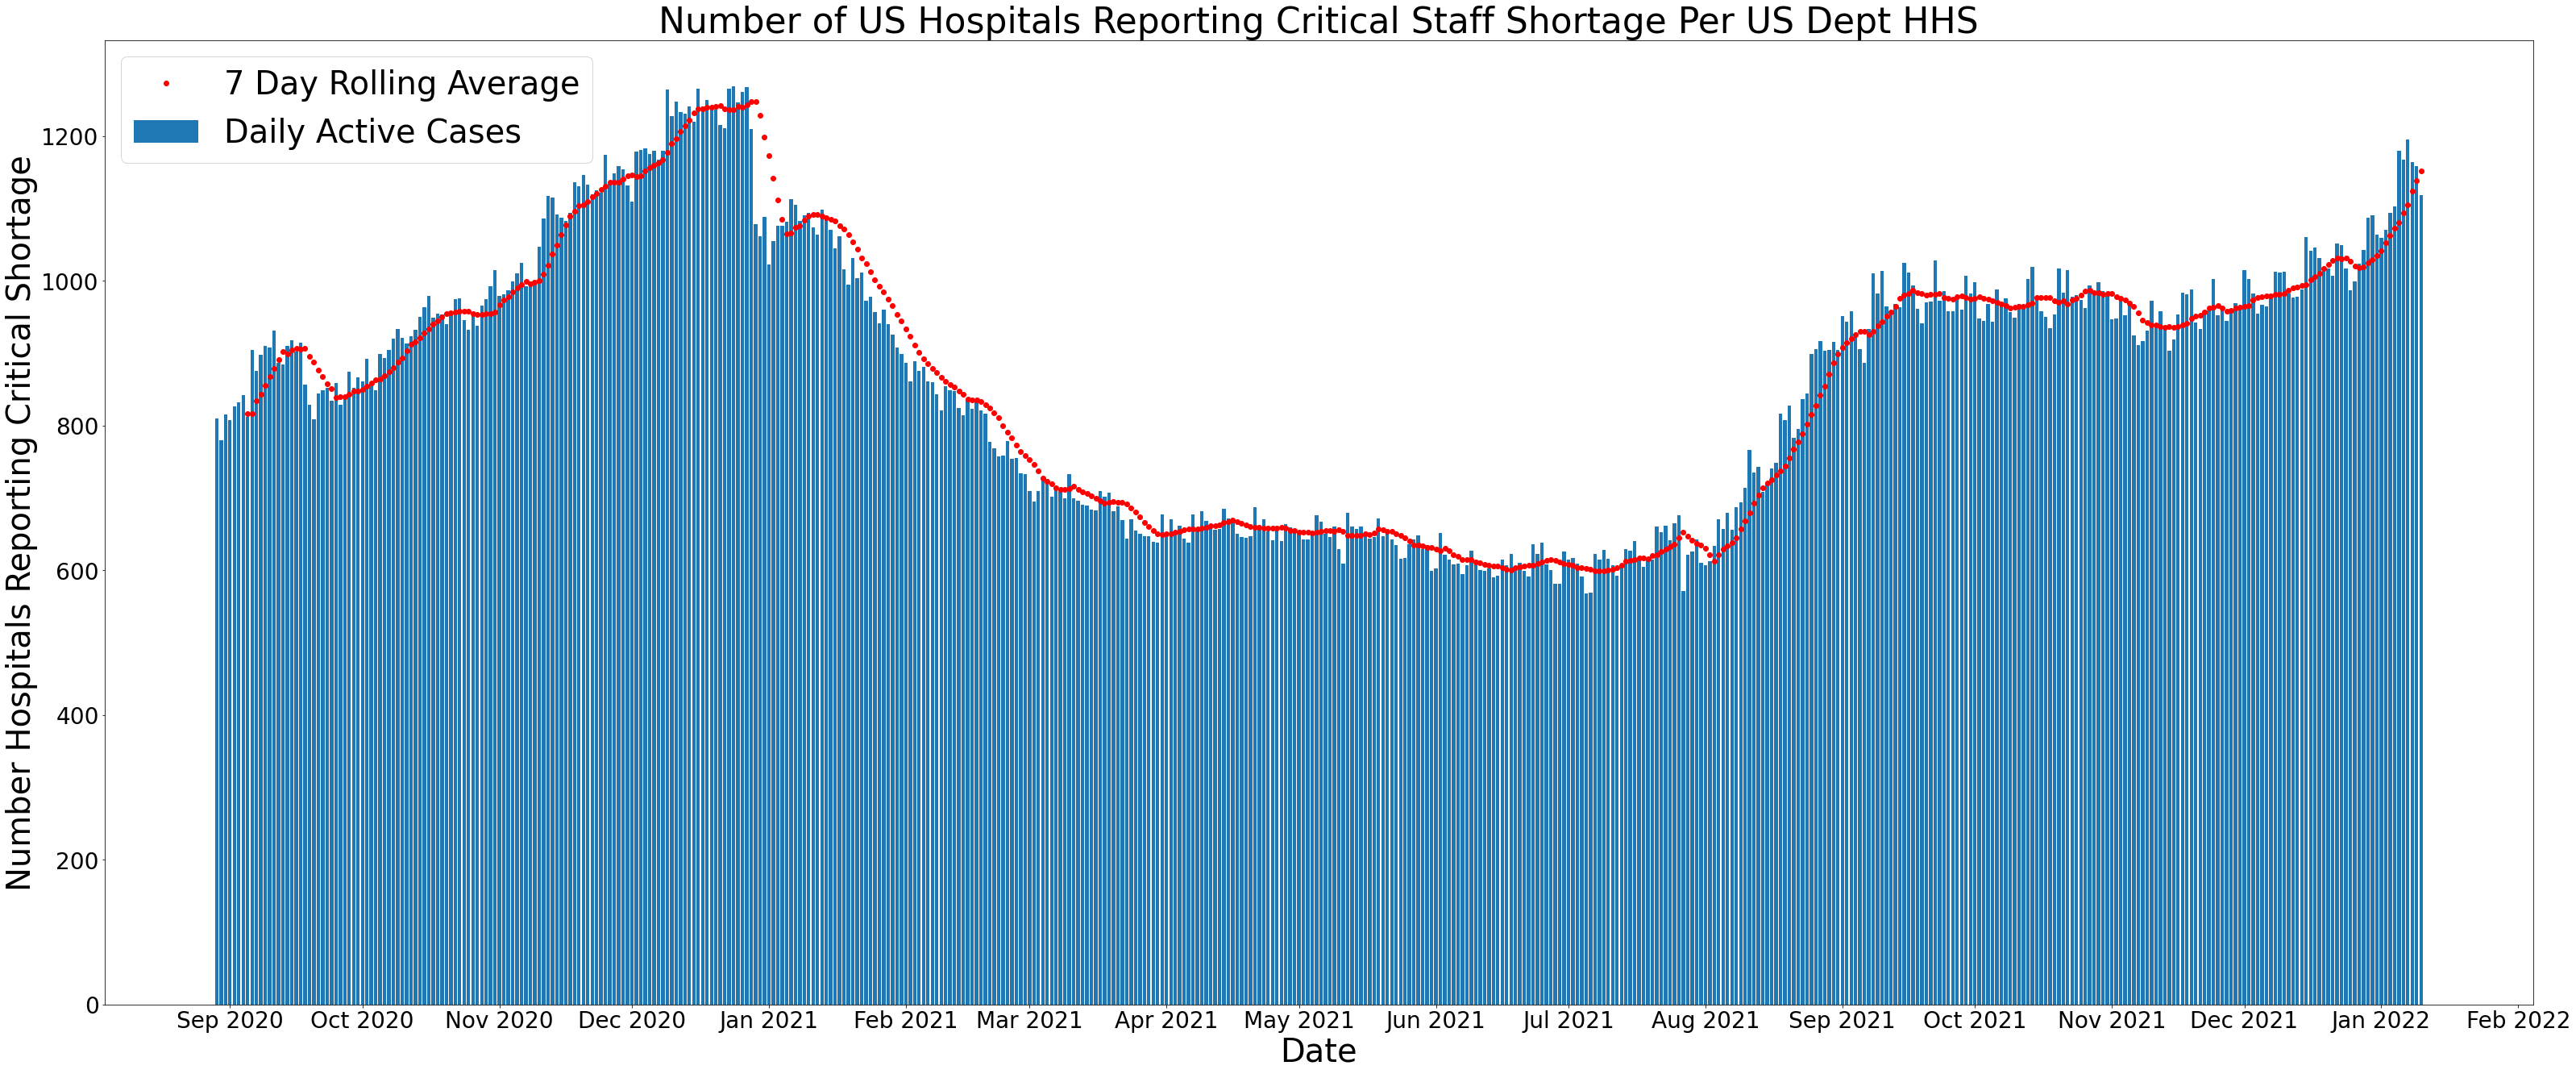

In [90]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Number of US Hospitals Reporting Critical Staff Shortage Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Number Hospitals Reporting Critical Shortage',color='black', fontsize = 40)
plt.bar(ccc.index, bbb.reported_critical_sum)
plt.plot(ccc_moving.reported_critical_sum, 'ro')
plt.legend(['7 Day Rolling Average','Daily Active Cases'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Critical Shortage'])
fig.savefig('HHS_critical_staffing_shortage_today.png')

In [93]:
for x in date_list:
    print(df_hhs[df_hhs.date == x]['deaths_covid'].sum())

0.0
29.0
29.0
29.0
29.0
29.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
6.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
2.0
1.0
3.0
2.0
4.0
4.0
8.0
12.0
8.0
10.0
17.0
21.0
18.0
34.0
97.0
52.0
64.0
80.0
258.0
413.0
640.0
826.0
960.0
1095.0
1017.0
1077.0
1098.0
1169.0
1264.0
1216.0
1225.0
1238.0
1378.0
1550.0
1182.0
1106.0
1145.0
1363.0
796.0
1020.0
963.0
1037.0
1077.0
1200.0
1131.0
1032.0
1081.0
1203.0
1289.0
1194.0
1302.0
1229.0
1067.0
1149.0
1118.0
1061.0
1114.0
1170.0
915.0
879.0
983.0
963.0
1036.0
1042.0
632.0
606.0
585.0
2729.0
2727.0
2767.0
2758.0
2782.0
2795.0
2734.0
2786.0
2738.0
2784.0
2743.0
2616.0
2543.0
2531.0
2578.0
2567.0
2697.0
371.0
431.0
376.0
343.0
397.0
379.0
385.0
407.0
331.0
284.0
299.0
351.0
338.0
294.0
303.0
259.0
256.0
264.0
371.0
319.0
359.0
406.0
404.0
410.0
443.0
485.0
434.0
437.0
362.0
437.0
4

In [95]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['deaths_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['deaths_covid'].sum()))

0.0
29.0
29.0
29.0
29.0
29.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
6.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
2.0
1.0
3.0
2.0
4.0
4.0
8.0
12.0
8.0
10.0
17.0
21.0
18.0
34.0
97.0
52.0
64.0
80.0
258.0
413.0
640.0
826.0
960.0
1095.0
1017.0
1077.0
1098.0
1169.0
1264.0
1216.0
1225.0
1238.0
1378.0
1550.0
1182.0
1106.0
1145.0
1363.0
796.0
1020.0
963.0
1037.0
1077.0
1200.0
1131.0
1032.0
1081.0
1203.0
1289.0
1194.0
1302.0
1229.0
1067.0
1149.0
1118.0
1061.0
1114.0
1170.0
915.0
879.0
983.0
963.0
1036.0
1042.0
632.0
606.0
585.0
2729.0
2727.0
2767.0
2758.0
2782.0
2795.0
2734.0
2786.0
2738.0
2784.0
2743.0
2616.0
2543.0
2531.0
2578.0
2567.0
2697.0
371.0
431.0
376.0
343.0
397.0
379.0
385.0
407.0
331.0
284.0
299.0
351.0
338.0
294.0
303.0
259.0
256.0
264.0
371.0
319.0
359.0
406.0
404.0
410.0
443.0
485.0
434.0
437.0
362.0
437.0
4

In [97]:
df_deaths_covid = pd.DataFrame(aaa,columns=['date', 'deaths_covid'])

In [98]:
df_deaths_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          741 non-null    datetime64[ns]
 1   deaths_covid  741 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.7 KB


In [104]:
ccc = df_deaths_covid.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()

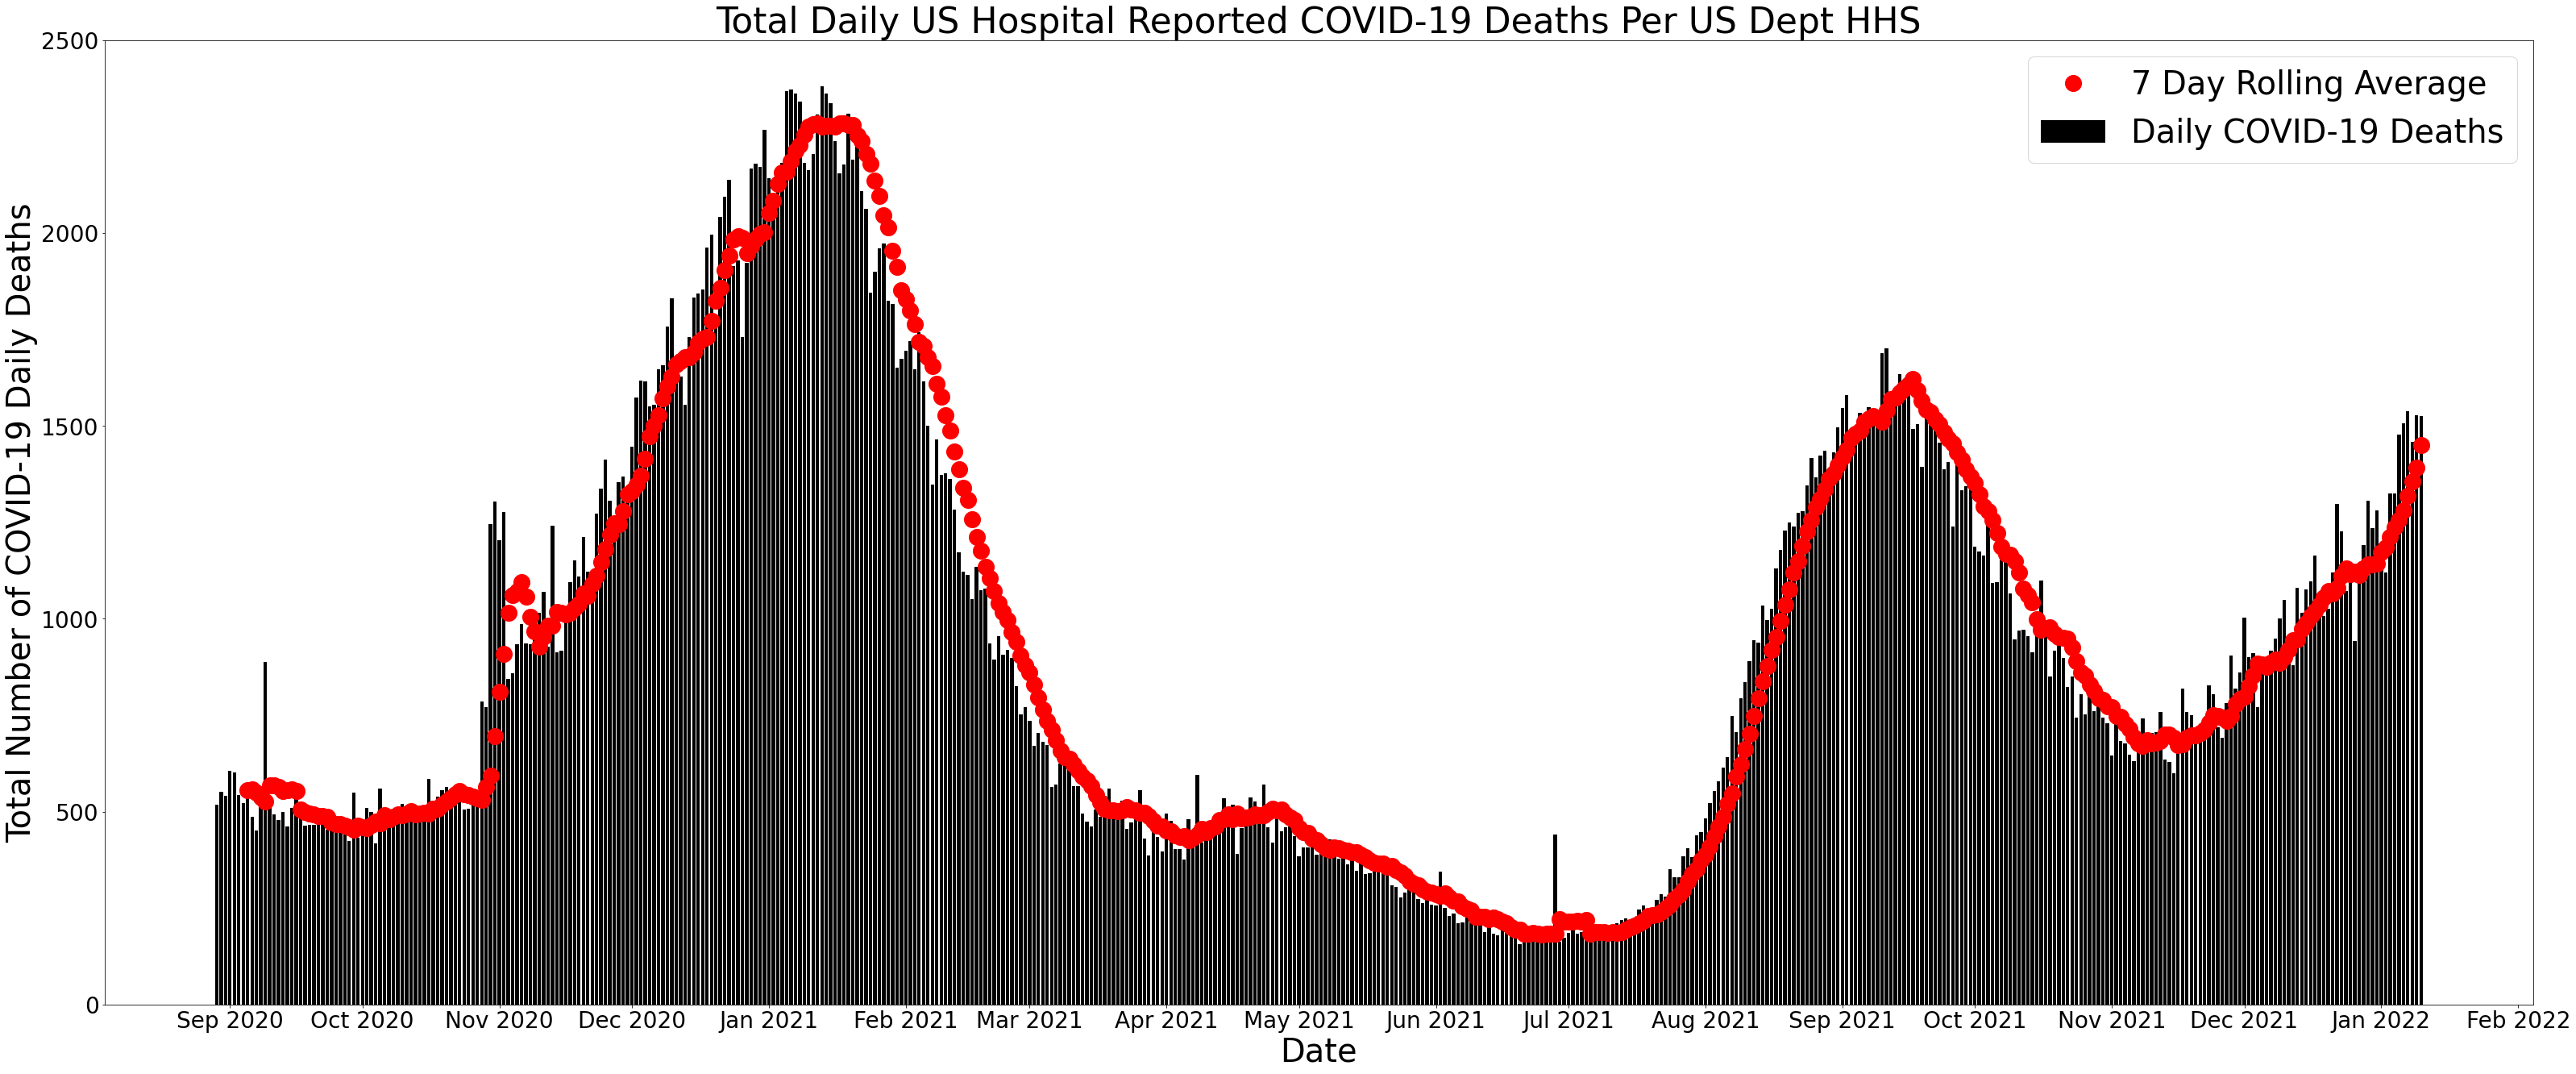

In [118]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Total Daily US Hospital Reported COVID-19 Deaths Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Total Number of COVID-19 Daily Deaths',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.deaths_covid, color = 'black')
plt.plot(ccc_rolling.deaths_covid, 'ro',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_hospital_deaths.png')

In [120]:
aaa = []
for x in date_list:
    print(df_hhs[df_hhs.date == x]['hospital_onset_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['hospital_onset_covid'].sum()))
df_hospital_onset_covid = pd.DataFrame(aaa,columns=['date', 'hospital_onset_covid'])

0.0
33.0
33.0
33.0
33.0
33.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
20.0
21.0
22.0
22.0
24.0
25.0
31.0
32.0
33.0
37.0
39.0
39.0
44.0
46.0
45.0
43.0
54.0
53.0
64.0
71.0
78.0
96.0
171.0
319.0
347.0
414.0
418.0
447.0
479.0
524.0
435.0
453.0
525.0
428.0
415.0
642.0
723.0
667.0
738.0
597.0
527.0
515.0
734.0
811.0
778.0
876.0
2204.0
730.0
688.0
695.0
1020.0
1095.0
1134.0
1018.0
997.0
1012.0
1253.0
1283.0
1197.0
1241.0
1197.0
1133.0
1123.0
1366.0
1361.0
1466.0
1462.0
1322.0
1137.0
926.0
934.0
844.0
800.0
759.0
892.0
983.0
891.0
914.0
952.0
954.0
710.0
883.0
894.0
827.0
699.0
1226.0
1119.0
1021.0
895.0
881.0
604.0
651.0
973.0
1035.0
1062.0
1092.0
839.0
519.0
825.0
504.0
497.0
578.0
557.0
417.0
485.0
493.0
500.0
478.0
463.0
446.0
454.0
474.0
498.0
472.0
575.0
559.0
551.0
483.0
530.0
931.0


In [125]:
ccc = df_hospital_onset_covid.set_index('date')[-300::]
ccc_rolling = ccc.rolling(7).mean().shift()

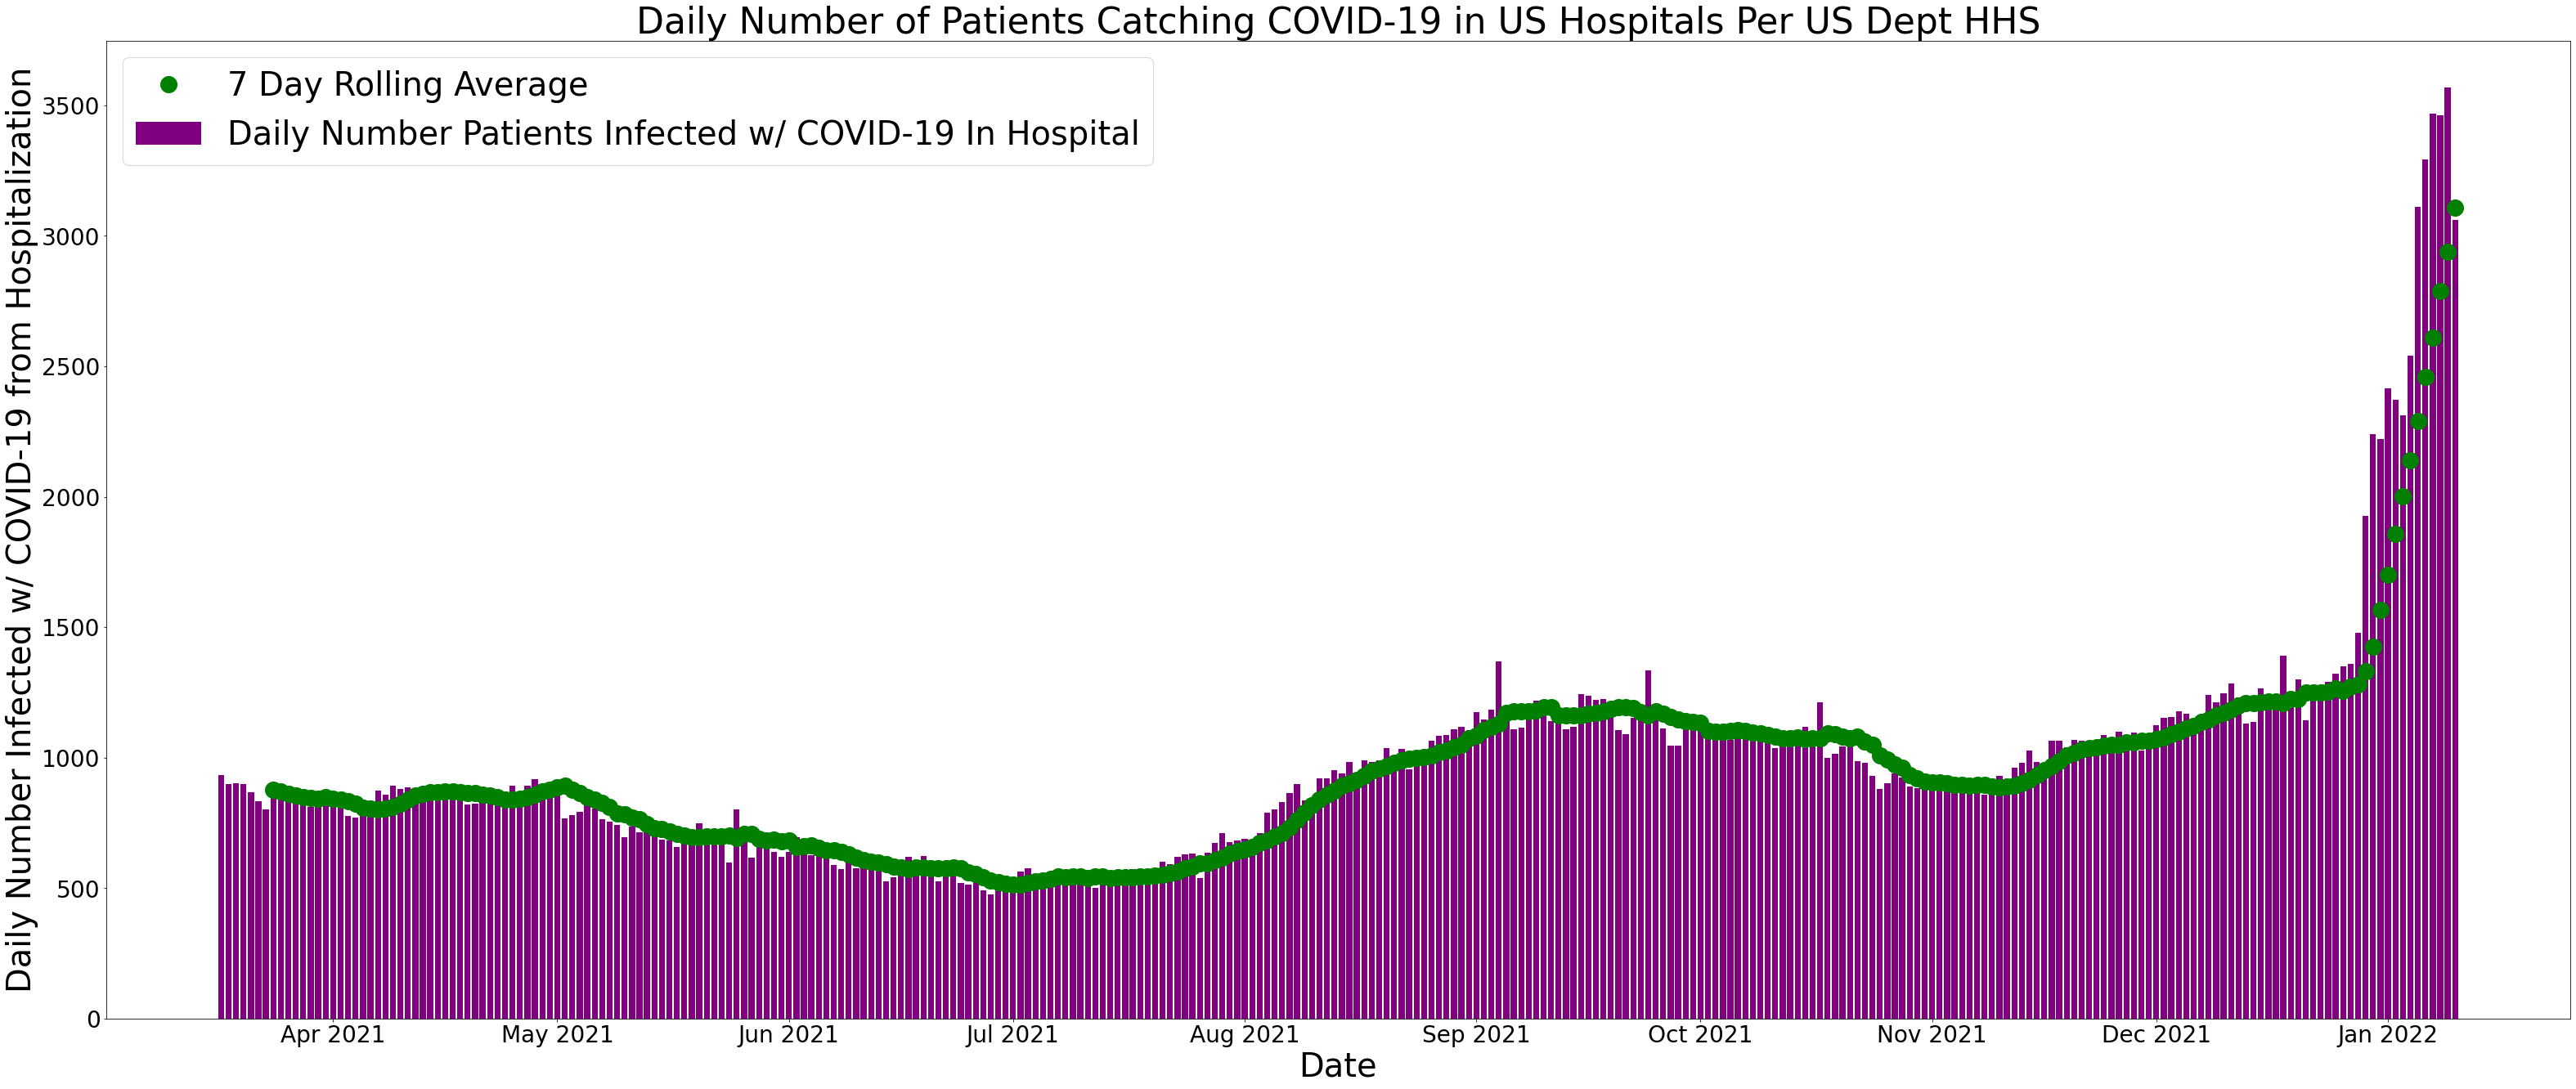

In [131]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number of Patients Catching COVID-19 in US Hospitals Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number Infected w/ COVID-19 from Hospitalization',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.hospital_onset_covid, color = 'purple')
plt.plot(ccc_rolling.hospital_onset_covid, 'go',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Patients Infected w/ COVID-19 In Hospital'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_hospital_onset_covid.png')